<a href="https://colab.research.google.com/github/biniyam-mulugeta/final/blob/main/VGG11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import numpy as np 
import keras
from keras.models import Model,Sequential
from keras.layers import Flatten,concatenate,GlobalAveragePooling2D,DepthwiseConv2D,Add#,Dense,Dropout,Conv2D
from keras.applications import densenet,mobilenet, mobilenet_v2,efficientnet#densenetmobilenet_v2#,efficientnet,vgg16,densenet
from keras.applications import vgg19,resnet
#from keras_preprocessing import image
#from keras_preprocessing.image import ImageDataGenerator
#from keras.utils.all_utils import to_categorical
from sklearn import preprocessing
from skimage.filters import threshold_otsu
import cv2
from pathlib import Path
import os
import glob
import matplotlib.pyplot as plt
#import seaborn as sns
#import zipfile
%matplotlib inline

In [3]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,GridSearchCV,StratifiedShuffleSplit
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from skimage import io

In [4]:
from keras.layers import Flatten,concatenate,GlobalAveragePooling2D,Input,Dense,Dropout,Conv2D,Activation,MaxPooling2D,BatchNormalization
from keras.layers import MaxPool2D,AveragePooling2D

In [5]:
import pandas as pd

In [6]:
SIZE = 32
data_image = []
data_label = []
for dir_path in glob.glob("/content/drive/My Drive/coffee_dataset/*"):
    label = dir_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        
        img = cv2.GaussianBlur(img,(5,5),0)
  
        #img = otsu_segmentation(img)]

        data_image.append(img)
        data_label.append(label)
data_image = np.array(data_image)
data_label = np.array(data_label)

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/coffee_dataset/phoma_cro/456_1.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/456_2.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/456_3.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/456_4.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/456_5.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/456_6.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/456_7.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/456_8.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/458.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/458_1.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/458_2.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/458_3.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/458_4.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/460.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/461.jpg
/content/drive/My Drive/coffee_dataset/phoma_cro/461_1.jpg
/content/dr

In [7]:
le = preprocessing.LabelEncoder()
le.fit(data_label)
train_labe_encoded = le.transform(data_label)

In [8]:
x_train,y_train = data_image,train_labe_encoded
x_train = x_train/255.0

In [9]:
from keras.utils.all_utils import to_categorical
y_train_one_hot = to_categorical(y_train)

#### train test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_tr,x_te,y_tr,y_te = train_test_split(x_train,y_train_one_hot,test_size=0.40,shuffle=True,random_state=42,stratify=y_train_one_hot)

In [12]:
print(x_tr.shape,'----',y_tr.shape)
print(x_te.shape,'----',y_te.shape)

(4240, 32, 32, 3) ---- (4240, 8)
(2827, 32, 32, 3) ---- (2827, 8)


In [13]:
x_v,x_tes,y_v,y_tes = train_test_split(x_te,y_te,test_size=0.5,shuffle=True,random_state=42,stratify=y_te)

In [14]:
shape = (32,32,3)

### VGG11

In [21]:
model_11=tf.keras.models.Sequential()

model_11.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,activation='relu',padding='same',input_shape=(32,32,3)))
model_11.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_11.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_11.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_11.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_11.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'))
model_11.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model_11.add(tf.keras.layers.Flatten())

model_11.add(tf.keras.layers.Dense(units=4096,activation='relu'))
model_11.add(tf.keras.layers.Dropout(.5))

model_11.add(tf.keras.layers.Dense(units=4096,activation='relu'))
model_11.add(tf.keras.layers.Dropout(0.5))

model_11.add(tf.keras.layers.Dense(units=8,activation='softmax'))

In [22]:
model_11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 256)        

In [23]:
model_11.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_11.fit(x_tr,y_tr,validation_data=(x_v,y_v), epochs=200)

Epoch 1/200
133/133 [==============================] - 8s 34ms/step - loss: 1.9906 - accuracy: 0.1807 - val_loss: 1.7486 - val_accuracy: 0.3786
Epoch 2/200
133/133 [==============================] - 3s 24ms/step - loss: 1.3847 - accuracy: 0.3809 - val_loss: 0.9743 - val_accuracy: 0.5244
Epoch 3/200
133/133 [==============================] - 3s 24ms/step - loss: 0.8552 - accuracy: 0.6118 - val_loss: 0.6759 - val_accuracy: 0.6787
Epoch 4/200
133/133 [==============================] - 4s 27ms/step - loss: 0.7180 - accuracy: 0.6623 - val_loss: 0.6104 - val_accuracy: 0.6660
Epoch 5/200
133/133 [==============================] - 3s 24ms/step - loss: 0.5976 - accuracy: 0.7050 - val_loss: 0.5154 - val_accuracy: 0.7169
Epoch 6/200
133/133 [==============================] - 3s 24ms/step - loss: 0.5839 - accuracy: 0.7071 - val_loss: 0.5533 - val_accuracy: 0.7226
Epoch 7/200
133/133 [==============================] - 3s 24ms/step - loss: 0.5747 - accuracy: 0.7125 - val_loss: 0.4937 - val_accuracy:

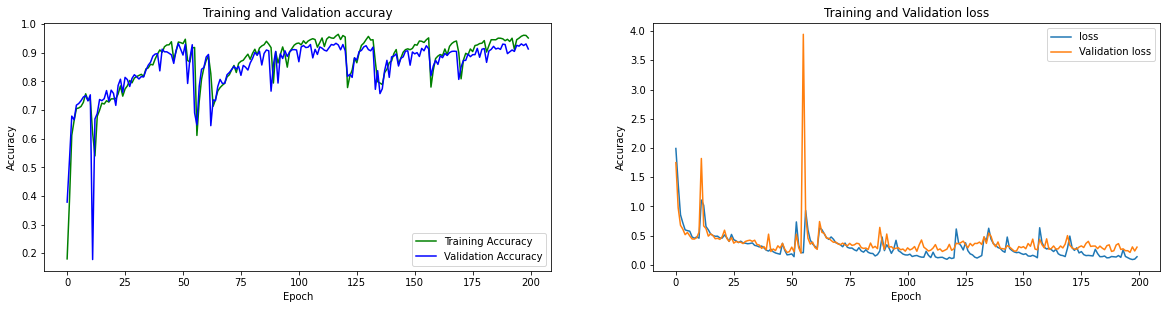

In [24]:
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.figure(figsize=(20,15))
  epochs = range(len(acc))
  plt.subplot(321)
  plt.plot(epochs, acc, 'g', label = 'Training Accuracy')
  plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
  plt.title('Training and Validation accuray')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc=0)
  #plt.figure(figsize=(10,10))
  plt.subplots_adjust(wspace=0.2,bottom=0.1)

  plt.subplot(322)
  plt.plot(epochs, loss,'', label = 'loss')
  plt.plot(epochs, val_loss,'', label = 'Validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc=0)
  #plt.figure(figsize=(10,10))
  plt.subplots_adjust(wspace=0.2)
  #show the graph
  plt.show()

In [29]:
target_names = ['CBD','CB_Healthy','CWD','Healthy','Cercospora','Mold','Phoma','CLR']

In [27]:
pred_t = model_11.predict(x_tes)
round_pred_t = np.argmax(pred_t,axis=-1)
y_tes_r = np.argmax(y_tes,axis=-1)

In [30]:
print(classification_report(y_tes_r,round_pred_t,target_names=target_names))

              precision    recall  f1-score   support

         CBD       0.91      0.83      0.87       195
  CB_Healthy       0.82      0.90      0.86       166
         CWD       0.99      1.00      0.99       178
     Healthy       1.00      1.00      1.00       214
  Cercospora       0.82      0.87      0.84       162
        Mold       0.95      0.92      0.93       163
       Phoma       0.94      0.98      0.96       162
         CLR       0.95      0.87      0.91       174

    accuracy                           0.92      1414
   macro avg       0.92      0.92      0.92      1414
weighted avg       0.92      0.92      0.92      1414

